In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import SimpleRNN, Activation, Dense
from keras.optimizers import Adam
import numpy as np

Using TensorFlow backend.


In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as pl
import matplotlib.colors as colors
import matplotlib.cm as cmap

In [4]:
# Open bkg and signal files
f_bkg = h5py.File('mcdata/mc16_13TeV:mc16_13TeV.361026.Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ6W.deriv.DAOD_JETM6.e3569_s3126_r9364_r9315_p3600.h5')
f_sig = h5py.File('mcdata/signal_Vs.h5')
#f_sig = h5py.File('Zprimett.merge.h5')

In [5]:
arr_sig=f_sig['lundjets_InDetTrackParticles']
arr_bkg=f_bkg['lundjets_InDetTrackParticles']

In [6]:
# Jet pt
pT_bkg = np.array(arr_bkg[:,:,:,2]).flatten()
print pT_bkg[:10]
pT_sig = np.array(arr_sig[:,:,:,2]).flatten()
print pT_sig[:10]

[ 1788.19213867  1788.19213867  1788.19213867  1788.19213867  1788.19213867
  1788.19213867  1788.19213867  1788.19213867  1788.19213867  1788.19213867]
[ 267.38525391  267.38525391  267.38525391  267.38525391  267.38525391
  267.38525391  267.38525391  267.38525391  267.38525391  267.38525391]


In [7]:
x_bkg = np.log(1/arr_bkg[:,:,:,0]).flatten()
y_bkg = np.log(np.array(arr_bkg[:,:,:,0]).flatten()*np.array(arr_bkg[:,:,:,5]).flatten())
x_sig = np.log(1/arr_sig[:,:,:,0]).flatten()
y_sig = np.log(np.array(arr_sig[:,:,:,0]).flatten()*np.array(arr_sig[:,:,:,5]).flatten())

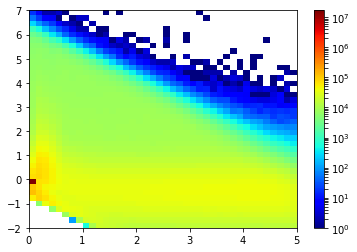

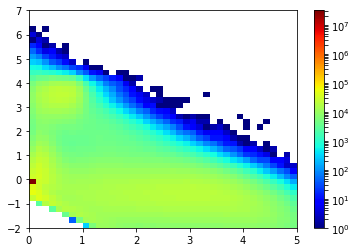

(40000000,)


In [8]:
# Plot Lund plane (no pt cut)
pl.hist2d(x_bkg, y_bkg, bins=40, range=[[0,5],[-2,7]], norm=colors.LogNorm(), cmap=cmap.jet)
pl.colorbar()
pl.show()
pl.hist2d(x_sig, y_sig, bins=40, range=[[0,5],[-2,7]], norm=colors.LogNorm(), cmap=cmap.jet)
pl.colorbar()
pl.show()
print pT_bkg.shape

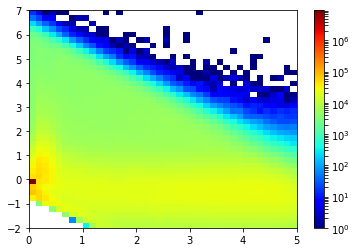

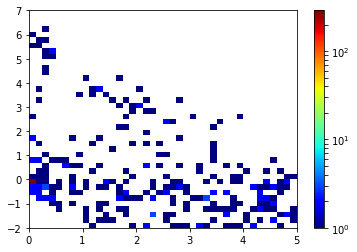

(23274460,)
(620,)


In [9]:
# Plot Lund plane (Jet pt > 1500)
pl.hist2d(x_bkg[pT_bkg > 1500], y_bkg[pT_bkg > 1500], bins=40, range=[[0,5],[-2,7]], norm=colors.LogNorm(), cmap=cmap.jet)
pl.colorbar()
pl.show()
pl.hist2d(x_sig[pT_sig > 1500], y_sig[pT_sig > 1500], bins=40, range=[[0,5],[-2,7]], norm=colors.LogNorm(), cmap=cmap.jet)
pl.colorbar()
pl.show()
print pT_bkg[pT_bkg > 1500].shape
print pT_bkg[pT_sig > 1500].shape

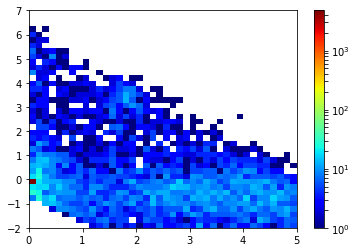

(9980,)


In [10]:
# Signal Lund plane (jet pt > 1000)
pl.hist2d(x_sig[pT_sig > 1000], y_sig[pT_sig > 1000], bins=40, range=[[0,5],[-2,7]], norm=colors.LogNorm(), cmap=cmap.jet)
pl.colorbar()
pl.show()
print pT_bkg[pT_sig > 1000].shape

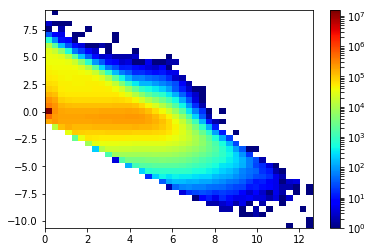

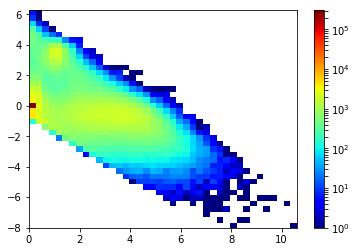

(37767320,)
(565920,)


In [11]:
# Lund plane (jet pt > 500)
pl.hist2d(x_bkg[pT_bkg > 500], y_bkg[pT_bkg > 500], bins=40, norm=colors.LogNorm(), cmap=cmap.jet)
pl.colorbar()
pl.show()
pl.hist2d(x_sig[pT_sig > 500], y_sig[pT_sig > 500], bins=40, norm=colors.LogNorm(), cmap=cmap.jet)
pl.colorbar()
pl.show()
print pT_bkg[pT_bkg > 500].shape
print pT_bkg[pT_sig > 500].shape